## Clustering Jerárquico

**Introducción:**

El clustering jerárquico es un algoritmo de **machine learning** no supervisado utilizado para agrupar datos en una jerarquía de clusters. A diferencia de otros algoritmos de clustering como k-means, el clustering jerárquico no requiere especificar el número de clusters a priori. En cambio, construye una jerarquía de clusters que puede visualizarse como un **dendrograma**. A partir del dendrograma, se puede elegir el número deseado de clusters cortando la dendrograma en el nivel deseado.

**Conceptos clave:**

* **Distancia:** La distancia entre dos puntos de datos se utiliza para determinar la similitud entre ellos. Existen diferentes métricas de distancia, como la distancia euclidiana o la distancia de Manhattan.
* **Enlace:** El enlace define cómo se combinan los clusters en la jerarquía. Existen dos tipos principales de enlaces:
    * **Enlace simple:** La distancia entre dos clusters es la distancia mínima entre dos puntos de datos pertenecientes a cada cluster.
    * **Enlace completo:** La distancia entre dos clusters es la distancia máxima entre dos puntos de datos pertenecientes a cada cluster.
* **Dendrograma:** Un dendrograma es una representación gráfica de la jerarquía de clusters. En un dendrograma, los clusters se representan por ramas, y la altura a la que se unen dos ramas indica la distancia entre los clusters correspondientes.

**Pasos del algoritmo:**

1. **Calcular la matriz de distancias:** Se calcula la matriz de distancias entre todos los puntos de datos. Cada elemento de la matriz representa la distancia entre dos puntos de datos específicos.
2. **Inicializar los clusters:** Cada punto de datos se asigna a un cluster individual.
3. **Repetir hasta que solo quede un cluster:**
    * **Encontrar los dos clusters más cercanos:** Se identifican los dos clusters más cercanos según la distancia entre ellos.
    * **Combinar los clusters más cercanos:** Se combinan los dos clusters más cercanos en un nuevo cluster.
    * **Actualizar la matriz de distancias:** Se actualiza la matriz de distancias para reflejar la nueva estructura de clusters.
4. **Construir el dendrograma:** Se crea un dendrograma a partir de la jerarquía de clusters construida en los pasos anteriores.



Un **dendrograma** es una estructura en forma de árbol que representa las distancias entre los clústeres. En el eje vertical (y), se muestra la distancia entre los clústeres en alguna métrica. A medida que descendemos en el dendrograma, los clústeres se dividen en unidades más pequeñas hasta llegar a los datos individuales. Por otro lado, al ascender en el dendrograma, se agrupan clústeres más pequeños en clústeres más grandes.

<img src="img/1.webp" width="400" align="center">

**Ejemplo con datos artificiales:**

Consideremos un conjunto de datos bidimensional que representa 6 puntos de datos:



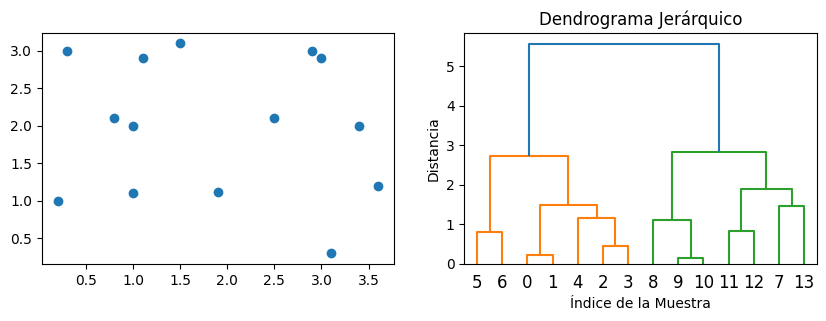

In [10]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage

datos = np.array([
    [0.8,2.1],
    [1,2],
    [1.1,2.9],
    [1.5,3.1],
    [0.3, 3],
    [0.2, 1],
    [1, 1.1],
    [1.9, 1.12],
    [2.5, 2.1],
    [2.9, 3],
    [3, 2.9],
    [3.4, 2],
    [3.6, 1.2],
    [3.1, 0.3]
])

plt.figure(figsize=(10, 3))
plt.subplot(121)
plt.scatter(datos[:,0],datos[:,1])

# Calcular enlaces de clusters
Z = linkage(datos, 'ward')
# Crear el dendrograma
plt.subplot(122)
plt.title('Dendrograma Jerárquico')
plt.xlabel('Índice de la Muestra')
plt.ylabel('Distancia')
dendrogram(Z)
plt.show()

**Número de Clústeres**

En el clustering jerárquico, no se asume un número específico de clústeres. Una vez construido el dendrograma, podemos cortarlo horizontalmente. Las ramas resultantes representan clústeres individuales en el nivel más alto del sistema. Sin embargo, incluso después de crear los clústeres, seguimos siendo conscientes de las relaciones dentro de los subclústeres que aún pueden formarse. Siempre tenemos la opción de ajustar el nivel de granularidad del clustering.




**Interpretación de un Dendrograma**

Cada nivel del dendrograma tiene un significado sutil en relación con los miembros de sus datos. En un gráfico de relaciones común, se puede interpretar que en la parte superior se encuentran los abuelos o la primera generación, el siguiente nivel corresponde a los padres o la segunda generación, y el nivel final pertenece a los hijos o la tercera generación. De manera similar, en cada procedimiento de ramificación del dendrograma, todos los puntos de datos que tienen membresía en cada nivel pertenecen a una cierta clase.

<img src="img/2.webp" width="300" align="left">
<img src="img/2b.webp" width="300">
<img src="img/3.webp" width="300" >

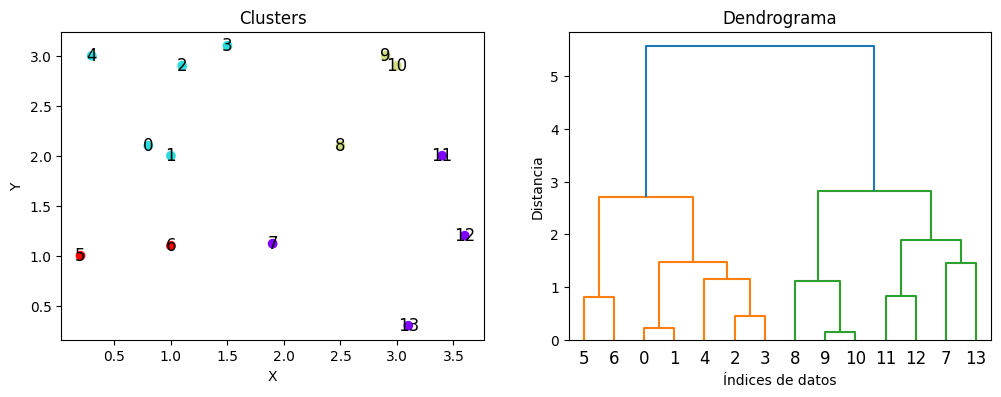

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Clustering jerárquico aglomerativo
enlace = linkage(datos, method='ward')
# Clustering con un número de clusters determinado
num_clusters = 4
clustering = AgglomerativeClustering(n_clusters=num_clusters).fit(datos)

# Visualización de los clusters coloreados
plt.figure(figsize=(12, 4))
plt.subplot(121)
for i in range(len(datos)):
    plt.text(datos[i][0], datos[i][1], str(i), fontsize=12, ha='center', va='center')
plt.scatter(datos[:,0], datos[:,1], c=clustering.labels_, cmap='rainbow')

plt.title('Clusters')
plt.xlabel('X')
plt.ylabel('Y')

# Visualización del dendrograma
plt.subplot(122)
plt.title('Dendrograma')
dendrogram(enlace)
plt.xlabel('Índices de datos')
plt.ylabel('Distancia')
plt.show()




**Clustering Aglomerativo**

Uno de los algoritmos más simples y fácilmente comprensibles utilizados para realizar el **clustering aglomerativo** es el **enlace simple**. En este algoritmo, comenzamos considerando cada punto de datos como un subconjunto. Definimos una métrica para medir la distancia entre todos los pares de subconjuntos en cada paso y fusionamos los dos subconjuntos más cercanos en cada paso. Repetimos este procedimiento hasta que solo quede un único cluster en el sistema.

## **Situación práctica**
Imaginemos que trabajamos en una empresa de análisis de redes sociales y estamos encargados de analizar el comportamiento de los usuarios en una plataforma de redes sociales. Queremos aplicar clustering jerárquico para identificar diferentes grupos de usuarios en función de sus patrones de actividad en la plataforma.

**Contexto:**
La plataforma de redes sociales ha recopilado datos de usuarios durante un período de tiempo determinado, incluidos detalles como la cantidad de publicaciones que realizan por día y la cantidad de veces que interactúan con otras publicaciones (me gusta, comentarios, etc.). Queremos agrupar a los usuarios en diferentes segmentos según estos comportamientos.

**Datos:**
Para ilustrar esta situación, generaremos datos sintéticos para 100 usuarios. Cada usuario tendrá dos características: la cantidad promedio de publicaciones por día y la cantidad promedio de interacciones por día. Utilizaremos la función `make_blobs` de `scikit-learn` para generar datos sintéticos distribuidos en grupos con diferentes características.



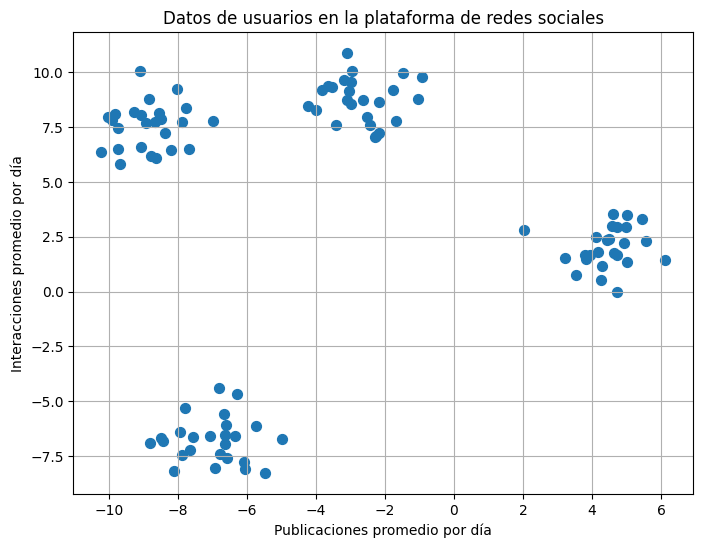

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage

# Generación de datos sintéticos
X, _ = make_blobs(n_samples=100, centers=4, cluster_std=1.0, random_state=42)

# Visualización de los datos
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title('Datos de usuarios en la plataforma de redes sociales')
plt.xlabel('Publicaciones promedio por día')
plt.ylabel('Interacciones promedio por día')
plt.grid(True)
plt.show()




Ahora que tenemos nuestros datos sintéticos, podemos aplicar clustering jerárquico para identificar grupos de usuarios con patrones de comportamiento similares en la plataforma de redes sociales. Utilizaremos el método de enlace completo para construir el dendrograma.


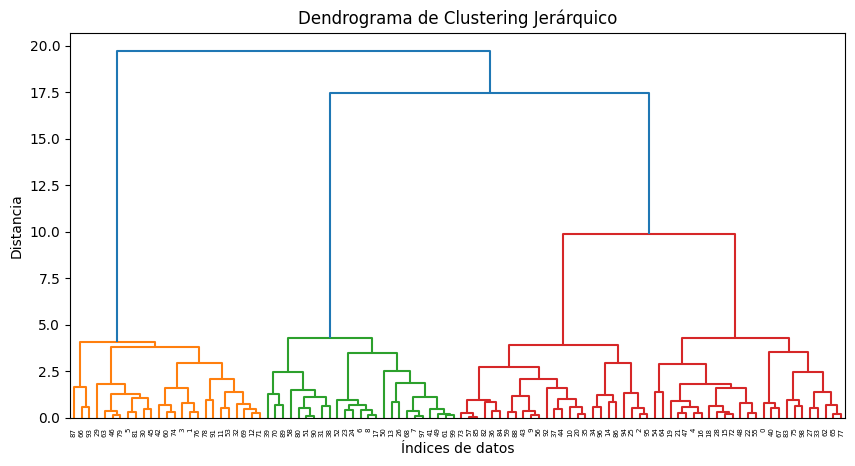

In [17]:
# Clustering jerárquico aglomerativo
enlace = linkage(X, method='complete')

# Visualización del dendrograma
plt.figure(figsize=(10, 5))
plt.title('Dendrograma de Clustering Jerárquico')
dendrogram(enlace)
plt.xlabel('Índices de datos')
plt.ylabel('Distancia')
plt.show()



El dendrograma nos ayudará a identificar cuántos grupos diferentes podemos tener y cómo se agrupan los usuarios en función de sus similitudes en cuanto a sus comportamientos en la plataforma. Después de determinar el número de grupos, podríamos utilizar métodos como la altura del dendrograma o el corte del dendrograma para definir los límites de los grupos y finalmente etiquetar a los usuarios en segmentos específicos.